<시작하세요! 텐서플로 2.0 프로그래밍> 예제코드입니다.

- 예제 코드를 실행하기 위해서는 [파일] > [드라이브에 사본 저장]으로 본인의 계정에 사본을 만든 다음 실행하면 됩니다.
- 예제 코드는 [깃허브 저장소](https://github.com/wikibook/tf2)에서도 동일하게 제공됩니다. 예제에 대한 질문이나 책에 대한 질문은 깃허브 저장소의 [Issues](https://github.com/wikibook/tf2/issues)에 올려주세요.
- 각 장의 예제 파일은 처음부터 끝까지 실행하는 상황을 가정하고 작성되었습니다. 혹시 세션이 다운되는 등의 이유로 실행이 되지 않는 경우가 있다면, 필요한 라이브러리를 import 하신 후에 실행하시면 됩니다. (tensorflow, numpy, pandas 등)

In [49]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

#  4.1 선형 회귀(Linear Regression)

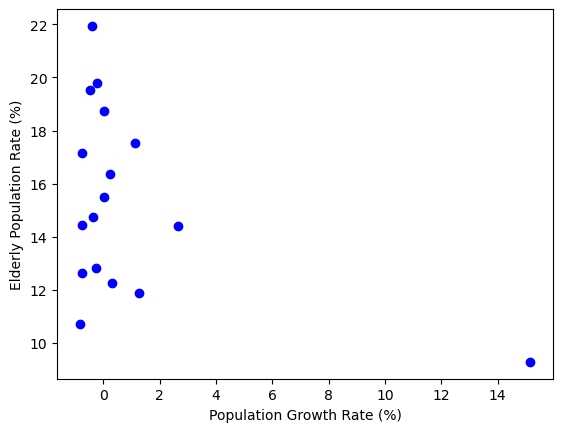

In [50]:
# 4.1 지역별 인구증가율과 고령인구비율 시각화 (데이터 파악)
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

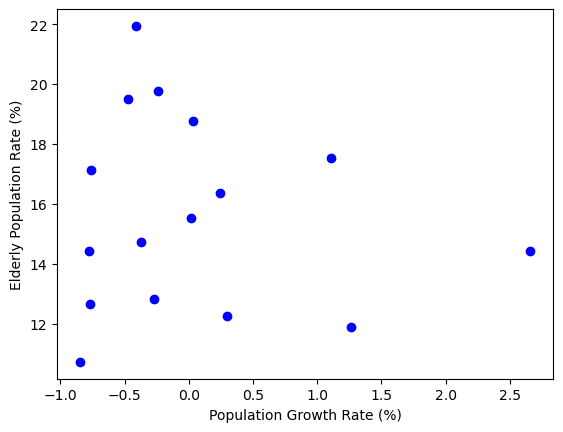

In [51]:
# 4.2 지역별 인구증가율과 고령인구비율 시각화: 극단치 제거
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_inc = population_inc[:5] + population_inc[6:] # 극단치 제거(15.17 제거)
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
population_old = population_old[:5] + population_old[6:]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

a: -0.355834147915461 b: 15.669317743971302


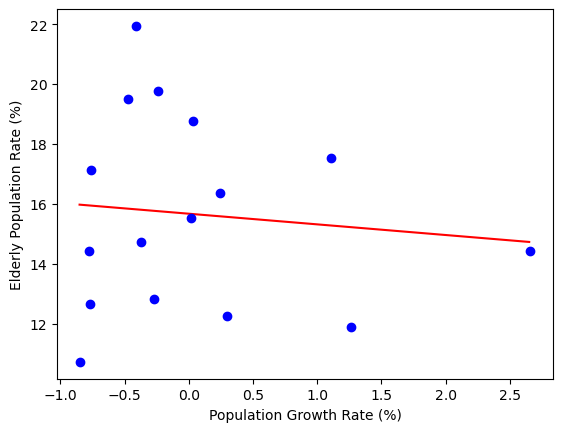

In [52]:
# 4.3 최소제곱법으로 회귀선 구하기
import numpy as np
import matplotlib.pyplot as plt
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# X, Y의 평균을 구합니다.
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법으로 a, b를 구합니다.
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a:', a, 'b:', b)

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구합니다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 붉은색 실선으로 회귀선을 그립니다.
plt.plot(line_x,line_y,'r-')

plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a: 0.13570046 b: 6.4036674 loss: 95.43393
199 a: -0.105390556 b: 10.94986 loss: 32.00242
299 a: -0.24860626 b: 13.648616 loss: 13.8545685
399 a: -0.3177777 b: 14.952158 loss: 10.293928
499 a: -0.34469506 b: 15.459395 loss: 9.824768
599 a: -0.35315508 b: 15.618834 loss: 9.783346
699 a: -0.35530812 b: 15.6594095 loss: 9.780901
799 a: -0.35575077 b: 15.667751 loss: 9.780806
899 a: -0.35582417 b: 15.669122 loss: 9.780803
999 a: -0.3558332 b: 15.669302 loss: 9.780804


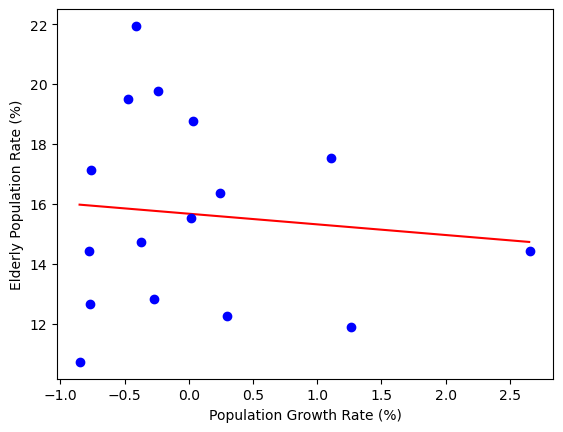

In [73]:
# 4.4 텐서플로를 이용해서 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
# X, Y : 데이터 분포
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a와 b를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X + b # 분포한 평균을 지나는 선 = 회귀선
    loss = tf.reduce_mean((Y - y_pred) ** 2) # Y - y_pred : 잔차 -> 0으로 만드는(최솟값을) a값을 찾는것이 목적
    return loss

optimizer = tf.keras.optimizers.Adam(learning_rate=0.07) # 경사하강법을 이용할 떄 Adam과 SGD등을 사용할 판단력 키우기
# learning rate : 변화량
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy()) #loss가 큰이유 : 데이터 산포가 커서

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

# 4.2 다항 회귀(Polynomial Regression)

99 a: 3.778213 b: -5.453125 c: 6.9203544 loss: 63.12172
199 a: 2.558209 b: -4.3128724 c: 10.724899 loss: 28.457148
299 a: 1.0976828 b: -2.0853324 c: 13.262968 loss: 14.765364
399 a: 0.20108262 b: -0.70336944 c: 14.791356 loss: 10.584295
499 a: -0.2569415 b: 0.0022859382 c: 15.573335 loss: 9.638334
599 a: -0.45694155 b: 0.3103923 c: 15.914886 loss: 9.478434
699 a: -0.5318884 b: 0.4258496 c: 16.042881 loss: 9.458175
799 a: -0.5560225 b: 0.4630283 c: 16.084099 loss: 9.456254
899 a: -0.5626896 b: 0.47329828 c: 16.095486 loss: 9.456118
999 a: -0.56426007 b: 0.47571817 c: 16.098167 loss: 9.456112


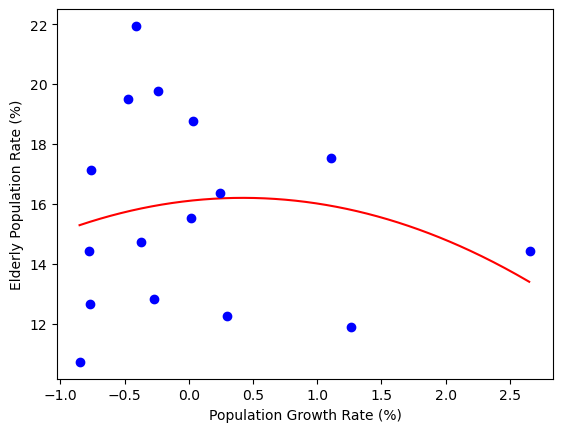

In [54]:
# 4.5 텐서플로우를 이용해서 2차 함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X*X + b * X + c # 다항회귀로 회귀선 표시
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(learning_rate=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b,c])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a: -1.2030174 b: 6.017537 c: -3.962067 d: 6.167004 loss: 65.38354
199 a: -2.0419571 b: 7.033216 c: -2.3486154 d: 9.754096 loss: 31.861322
299 a: -1.7542284 b: 5.389827 c: -0.98040354 d: 11.942369 loss: 20.822098
399 a: -1.0210774 b: 3.0701704 c: -0.5880827 d: 13.470316 loss: 14.730921
499 a: -0.30330038 b: 0.96436906 c: -0.4836255 d: 14.624185 loss: 11.22011
599 a: 0.26655728 b: -0.6845047 c: -0.43908587 d: 15.49127 loss: 9.396076
699 a: 0.6794973 b: -1.876411 c: -0.41159716 d: 16.112999 loss: 8.548776
799 a: 0.95979273 b: -2.6850455 c: -0.39357904 d: 16.534025 loss: 8.196271
899 a: 1.1389654 b: -3.2018733 c: -0.38217533 d: 16.80296 loss: 8.064878
999 a: 1.2469388 b: -3.5133104 c: -0.3753245 d: 16.964993 loss: 8.021033


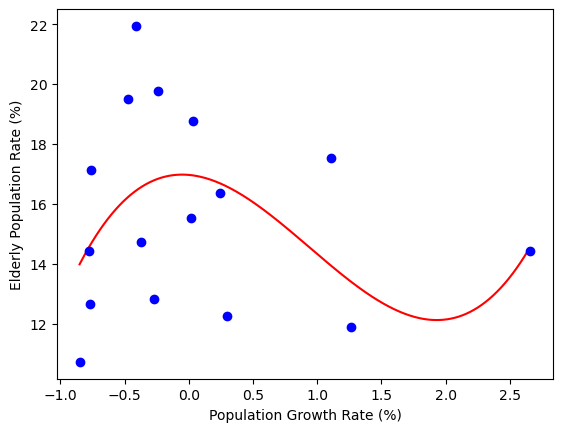

In [55]:
# 4.6 텐서플로우를 이용해서 3차 함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c, d를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X*X*X + b * X*X + c * X + d # 다항회귀로 회귀선 표시
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(learning_rate=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b,c,d])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'd:', d.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

# 4.3 딥러닝 네트워크를 이용한 회귀

In [56]:
# 4.7 딥러닝 네트워크를 이용한 회귀
import tensorflow as tf
import numpy as np

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 6)                 12        
                                                                 
 dense_21 (Dense)            (None, 1)                 7         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [57]:
# 4.8 딥러닝 네트워크의 학습
model.fit(X, Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 218ms/step - loss: 254.5688
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 131.4335
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 13.7263
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 9.8106
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 9.5092
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 9.4562
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 9.4205
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 9.3824
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 9.3403
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 9.2943


In [58]:
# 4.9 딥러닝 네트워크의 Y값 예측
model.predict(X)

1/1 [==============================] - 0s 47ms/step


array([[16.039944 ],
       [15.477962 ],
       [15.239916 ],
       [16.059414 ],
       [15.424087 ],
       [16.053074 ],
       [15.97342  ],
       [15.813735 ],
       [15.490719 ],
       [15.892966 ],
       [15.385613 ],
       [15.8630705],
       [15.957127 ],
       [16.058147 ],
       [15.503362 ],
       [13.692823 ]], dtype=float32)

11/11 [==============================] - 0s 598us/step


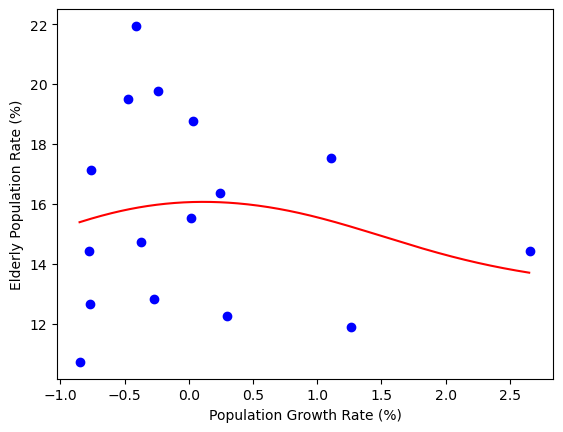

In [59]:
# 4.10 딥러닝 네트워크의 회귀선 확인
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

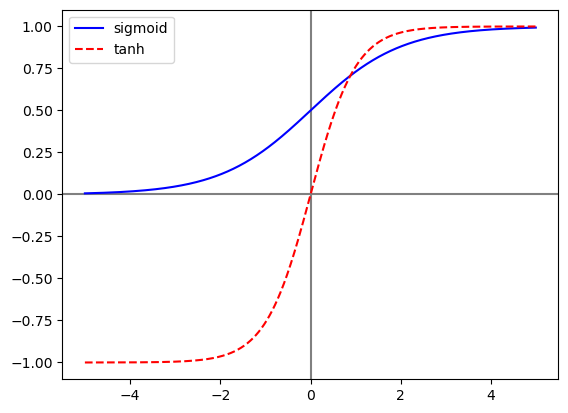

In [60]:
# 그림 4.2 출력 코드
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.legend()
plt.show()

# 4.4 보스턴 주택 가격 데이터세트(Boston Housing Dataset)

In [77]:
# 4.11 데이터 불러오기
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])
print(train_X.shape) # row, column수

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2
(404, 13)


In [62]:
# 4.12 데이터 전처리(정규화) -> 0과 1 사이의 값으로 모으기
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [63]:
# 4.13 Boston Housing Dataset 회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)), # 입력단자가 13개 ->  cloumn수가 13개
    tf.keras.layers.Dense(units=39, activation='relu'), # units는 감으로.......시그널보내시그널 보내 찌리시싯ㅅ
    tf.keras.layers.Dense(units=26, activation='relu'), # 통상적으로 많이 사용되는 수를 사용하긴함.
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss='mse')

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 52)                728       
                                                                 
 dense_23 (Dense)            (None, 39)                2067      
                                                                 
 dense_24 (Dense)            (None, 26)                1040      
                                                                 
 dense_25 (Dense)            (None, 1)                 27        
                                                                 
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


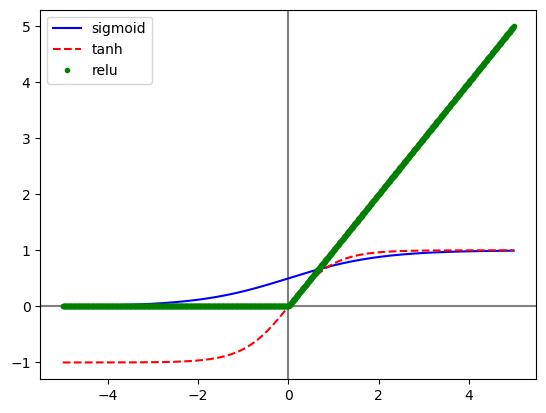

In [64]:
# 그림 4.5 출력 코드
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

In [65]:
# 4.14 회귀 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)


Epoch 1/25
10/10 [==============================] - 1s 12ms/step - loss: 1.6828 - val_loss: 1.4890
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.8156 - val_loss: 0.7384
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2953 - val_loss: 0.5020
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2650 - val_loss: 0.4084
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2302 - val_loss: 0.4116
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1891 - val_loss: 0.9282
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.3906 - val_loss: 0.2747
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2072 - val_loss: 0.2301
Epoch 9/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1805 - val_loss: 0.2363
Epoch 10/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1626 - val_loss: 0.2080
Epoch 11/25
10/10 

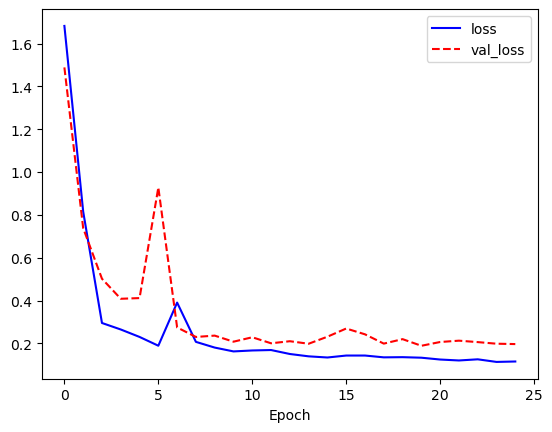

In [66]:
# 4.15 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss') # 훈련(train)데이터 loss
plt.plot(history.history['val_loss'], 'r--', label='val_loss') # test데이터 loss
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [67]:
# 4.16 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 1ms/step - loss: 0.2619


0.2618674039840698

4/4 [==============================] - 0s 1ms/step


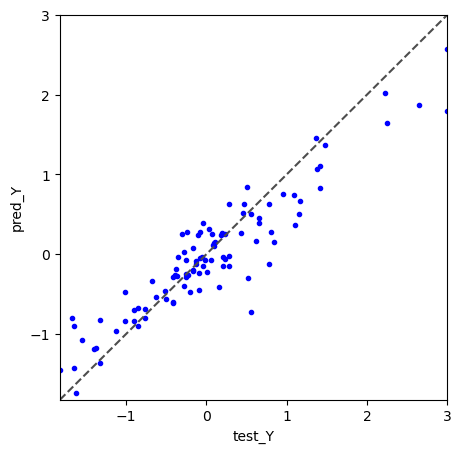

In [68]:
# 4.17 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [69]:
# 4.18 모델 재정의 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 1s 12ms/step - loss: 1.3121 - val_loss: 1.2075
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.7175 - val_loss: 1.0230
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.6046 - val_loss: 0.8230
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.4599 - val_loss: 0.7057
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.4079 - val_loss: 0.5826
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.3713 - val_loss: 0.7107
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.3599 - val_loss: 0.6503
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.3822 - val_loss: 0.5929


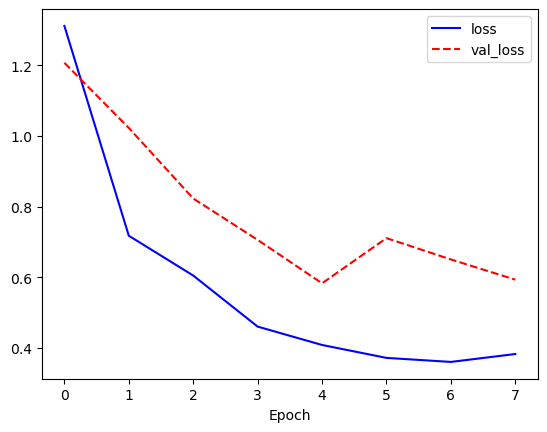

In [70]:
# 4.19 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [71]:
# 4.20 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 1ms/step - loss: 0.3958


0.39577817916870117

4/4 [==============================] - 0s 1ms/step


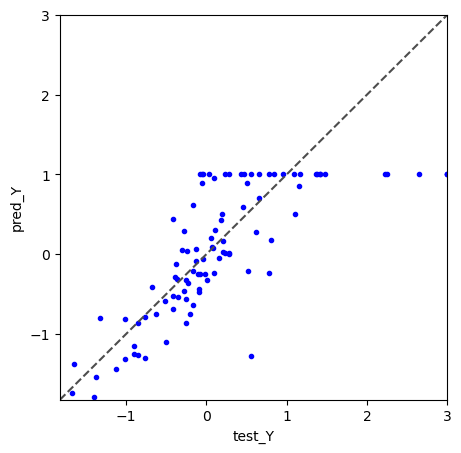

In [72]:
# 4.21 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()